In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import platform
import matplotlib as mpl
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels
from patsy import dmatrices

In [2]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
df=pd.read_csv('data3.csv')

In [4]:
capital_before=['창업이전자기자금', '창업이전개인간차용',
       '창업이전정부출연금보조금', '창업이전정부융자보증', '창업이전엔젤벤처캐피탈투자', '창업이전은행비은행대출']
capital_after=[ '창업이후자기자금', '창업이후개인간차용', '창업이후정부출연금보조금', '창업이후정부융자대출', '창업이후엔젤벤처캐피탈투자',
       '창업이후은행비은행대출', '창업이후주식회사채발행']

1비율이 높은 두개빼고 다 지움

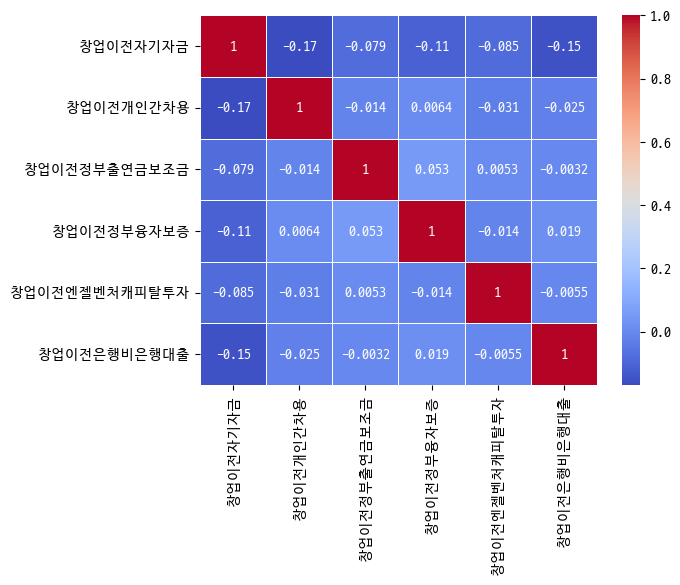

In [5]:
cb_corr=df[capital_before].corr()
sns.heatmap(cb_corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.show()

In [6]:
drop_col1=[ '창업이전개인간차용','창업이전정부출연금보조금', '창업이전정부융자보증', '창업이전엔젤벤처캐피탈투자']
df.drop(axis=1,columns=drop_col1,inplace=True)

 1의 비율이 제일높은 창업이후자기자금만 남김.-창업이후은행비은행대출도 남기려고 했는데 상관성이 높아서 지움

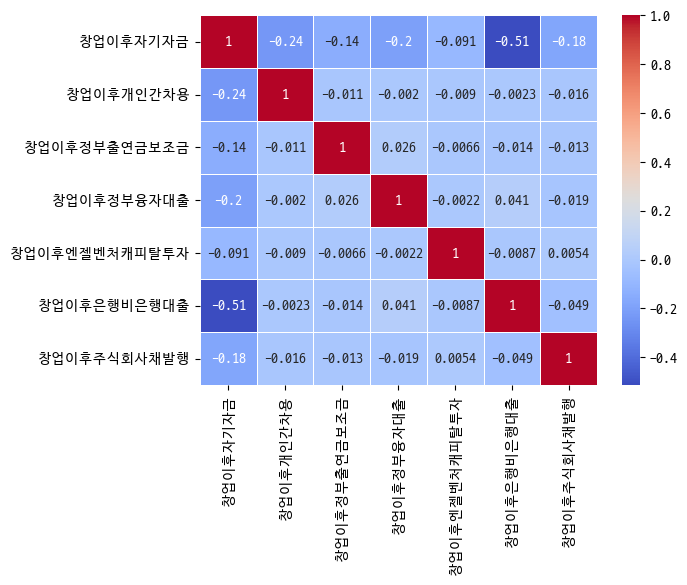

In [7]:
ca_corr=df[capital_after].corr()
sns.heatmap(ca_corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.show()

In [8]:
drop_col=[ '창업이후개인간차용', '창업이후정부출연금보조금', '창업이후정부융자대출', '창업이후엔젤벤처캐피탈투자',
       '창업이후은행비은행대출', '창업이후주식회사채발행']
df.drop(axis=1,columns=drop_col,inplace=True)

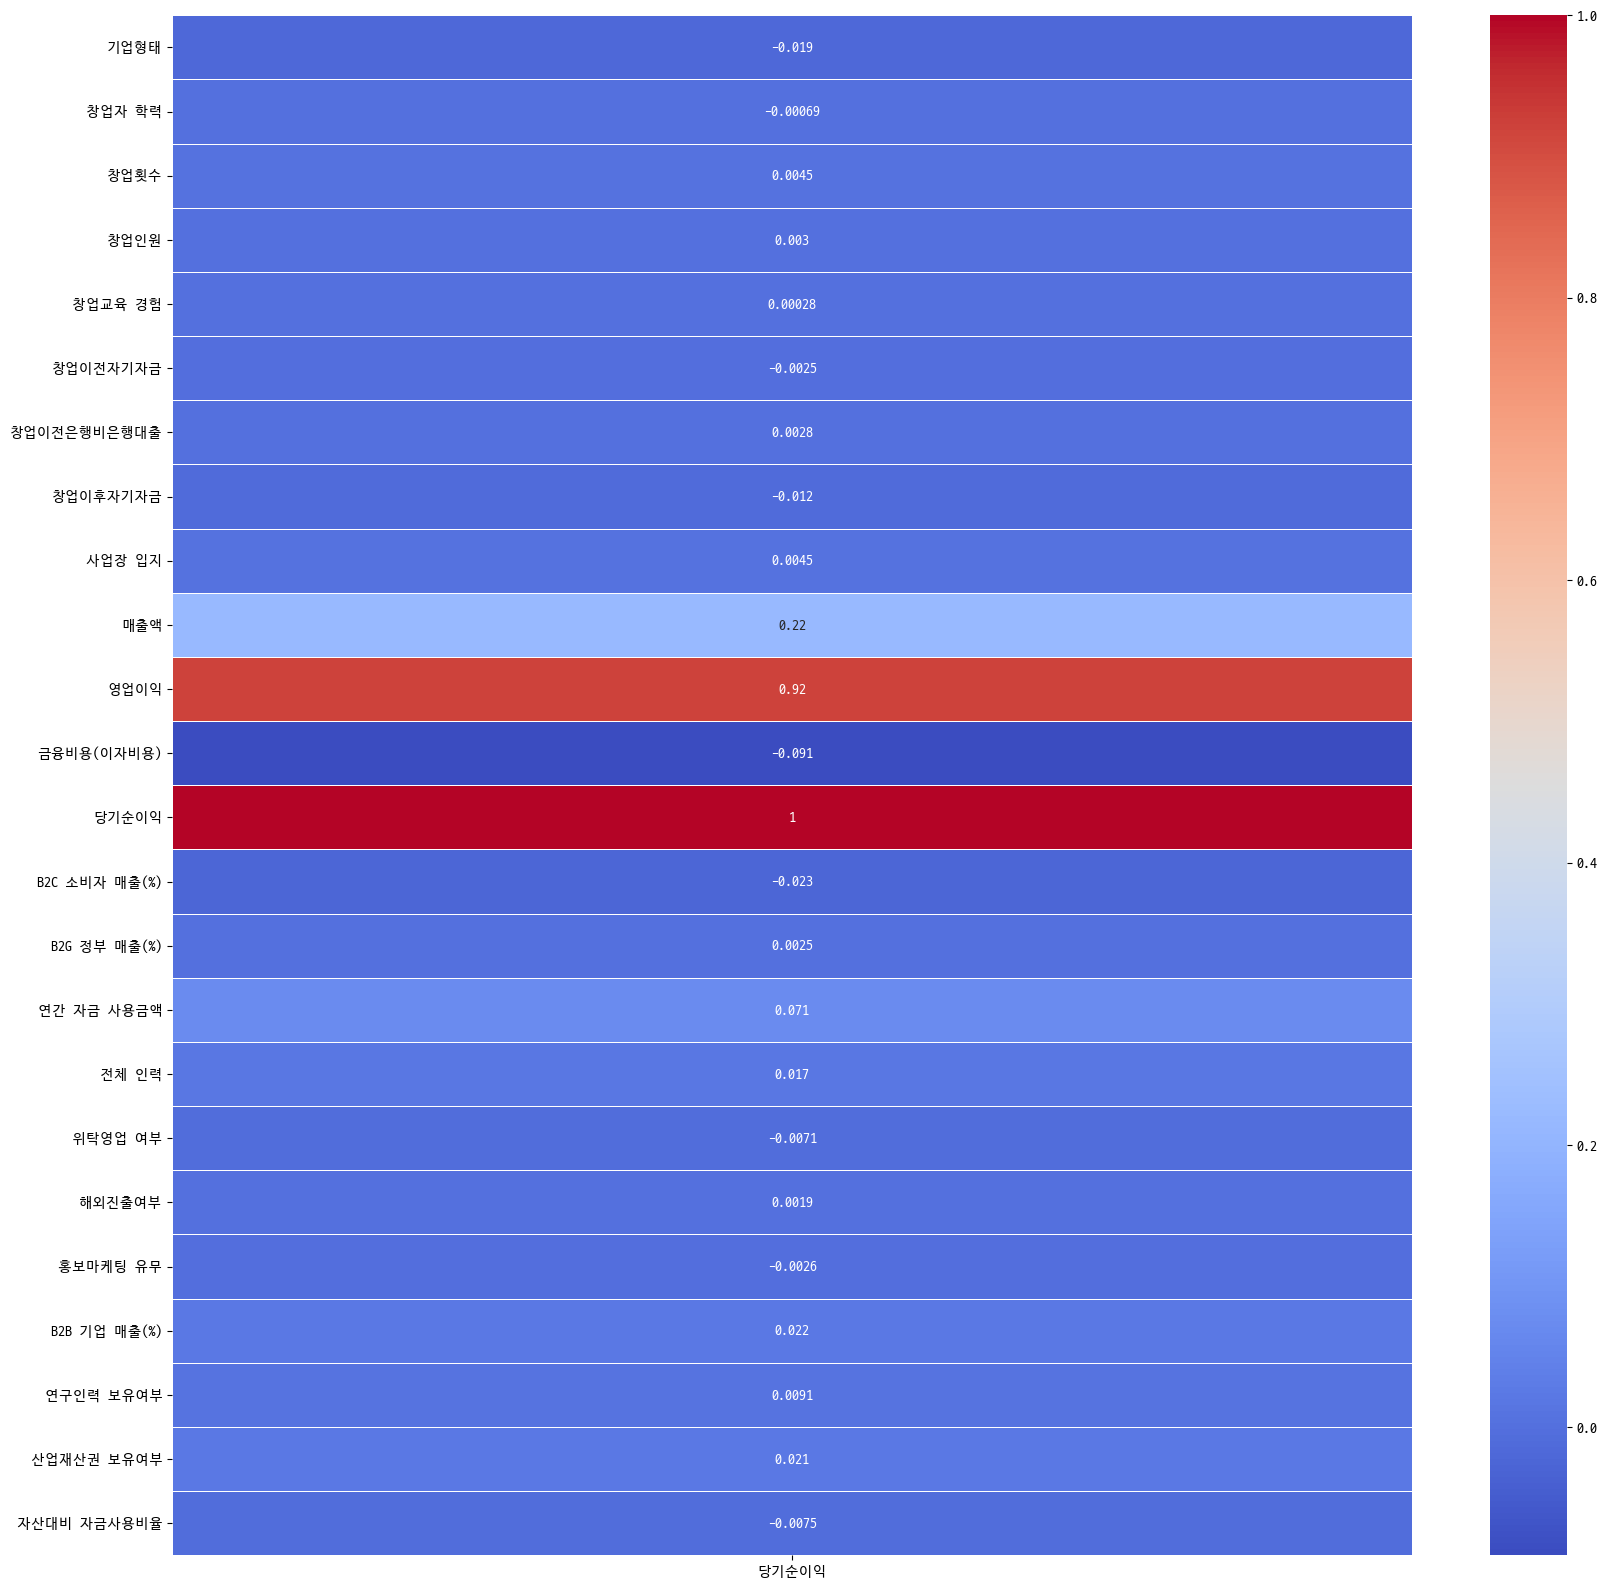

In [9]:
correlation_sales = df.corr()['당기순이익'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.show()

In [10]:
df.drop(axis=1,columns='B2B 기업 매출(%)',inplace=True) #다중공선성
df.columns

Index(['기업형태', '창업자 학력', '창업횟수', '창업인원', '창업교육 경험', '창업이전자기자금', '창업이전은행비은행대출',
       '창업이후자기자금', '사업장 입지', '매출액', '영업이익', '금융비용(이자비용)', '당기순이익',
       'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액', '전체 인력', '위탁영업 여부',
       '해외진출여부', '홍보마케팅 유무', '연구인력 보유여부', '산업재산권 보유여부', '자산대비 자금사용비율'],
      dtype='object')

In [11]:
df = df.rename(columns={
    '기업형태': '기업_형태',
    '창업자 학력': '창업자_학력',
    '창업횟수': '창업_횟수',
    '창업인원': '창업_인원',
    '창업교육 경험': '창업교육_경험',
    '창업이전자기자금': '창업이전_자기자금',
    '창업이전은행비은행대출': '창업이전_은행비은행_대출',
    '창업이후자기자금': '창업이후_자기_자금',
    '사업장 입지': '사업장_입지',
    '매출액': '매출액',
    '영업이익': '영업이익',
    '금융비용(이자비용)': '금융비용_이자비용',
    'B2C 소비자 매출(%)': 'B2C_소비자매출_비율',
    'B2G 정부 매출(%)': 'B2G_정부매출_비율',
    '연간 자금 사용금액': '연간자금_사용_금액',
    '전체 인력': '전체_인력',
    '위탁영업 여부': '위탁영업_여부',
    '해외진출여부': '해외진출_여부',
    '홍보마케팅 유무': '홍보마케팅_유무',
    '연구인력 보유여부': '연구인력_보유여부',
    '산업재산권 보유여부': '산업재산권_보유_여부',
    '자산대비 자금사용비율': '자산대비_자금사용비율'
})

In [12]:
from sklearn.preprocessing import StandardScaler
scale_col=['매출액', '영업이익','연간자금_사용_금액','자산대비_자금사용비율']
scaler = StandardScaler()
df[scale_col] = scaler.fit_transform(df[scale_col])

In [13]:

# 회귀 분석 수행
y, X = dmatrices('당기순이익 ~ 기업_형태 + 창업자_학력 + 창업_횟수 + 창업_인원 + 창업교육_경험 + 창업이전_자기자금 + '
                 '창업이전_은행비은행_대출 + 창업이후_자기_자금 + 사업장_입지 + 매출액 + 영업이익 + 금융비용_이자비용 + '
                 'B2C_소비자매출_비율 + B2G_정부매출_비율 + 연간자금_사용_금액 + 전체_인력 + 위탁영업_여부 + '
                 '해외진출_여부 + 홍보마케팅_유무 + 연구인력_보유여부 + 산업재산권_보유_여부 + 자산대비_자금사용비율', 
                 data=df, return_type="dataframe")

# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  당기순이익   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     9009.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        20:02:58   Log-Likelihood:            -4.4849e+05
No. Observations:               31980   AIC:                         8.970e+05
Df Residuals:                   31957   BIC:                         8.972e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.989e+04   1.25e+04      3.999

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


x = df.drop(columns=['당기순이익'])
# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         Variable        VIF
0       Intercept  55.979882
1           기업_형태   1.035233
2          창업자_학력   1.070551
3           창업_횟수   1.007061
4           창업_인원   1.002653
5         창업교육_경험   1.014099
6       창업이전_자기자금   1.044095
7   창업이전_은행비은행_대출   1.052021
8      창업이후_자기_자금   1.060002
9          사업장_입지   1.064148
10            매출액   1.842995
11           영업이익   1.145495
12      금융비용_이자비용   1.081306
13   B2C_소비자매출_비율   1.190893
14    B2G_정부매출_비율   1.068042
15     연간자금_사용_금액   1.384700
16          전체_인력   1.222370
17        위탁영업_여부   1.015749
18        해외진출_여부   1.040809
19       홍보마케팅_유무   1.049462
20      연구인력_보유여부   1.147222
21    산업재산권_보유_여부   1.103756
22    자산대비_자금사용비율   1.012019


In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 및 학습
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ridge_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge.coef_[0]})
print(ridge_coefficients)


Mean Squared Error: 162317134653.1748
         Variable    Coefficient
0       Intercept       0.000000
1           기업_형태   -2420.710167
2          창업자_학력    -470.858077
3           창업_횟수    -310.013374
4           창업_인원    1839.108502
5         창업교육_경험    -836.680796
6       창업이전_자기자금    1614.661957
7   창업이전_은행비은행_대출   -2373.603593
8      창업이후_자기_자금   -1934.101391
9          사업장_입지    1557.810339
10            매출액  -27220.657178
11           영업이익  671829.693939
12      금융비용_이자비용  -34305.872830
13   B2C_소비자매출_비율   -2224.759118
14    B2G_정부매출_비율   -2405.852520
15     연간자금_사용_금액  -26579.763202
16          전체_인력   -8280.882782
17        위탁영업_여부   -1478.108577
18        해외진출_여부    -186.589893
19       홍보마케팅_유무     154.833042
20      연구인력_보유여부    -674.536619
21    산업재산권_보유_여부    2553.156158
22    자산대비_자금사용비율   12915.397304


In [16]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

X = df.drop(columns=['당기순이익'])
y = df['당기순이익']

# 데이터 분할 (학습 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    # 하이퍼파라미터 탐색 범위 지정
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 및 R^2 점수 출력
print("Best trial:")
print("  Value: ", study.best_trial.value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print("    {}: {}".format(key, value))

# 최적의 하이퍼파라미터로 모델 재훈련 및 조정된 R^2 계산
best_params = study.best_trial.params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# R^2 점수 계산
r2 = r2_score(y_test, y_pred)
# Adjusted R^2 점수 계산
adjusted_r2=1-((1-r2)*(149)/(150-1-41))

# 결과 출력
print(f'R^2 score: {r2}')
print(f'Adjusted R^2 score: {adjusted_r2}')


C:\Users\yeonn\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-26 20:02:59,381] A new study created in memory with name: no-name-2f18cdaa-048d-4571-a029-cd58f209afbe
C:\Users\yeonn\AppData\Local\Temp\ipykernel_23960\1465839769.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2024-05-26 20:02:59,767] Trial 0 finished with value: 0.24175754954916218 and parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.021859709838651244}. Best is trial 0 with value: 0.24175754954916218.
C:\Users\yeonn\AppData\Local\Temp\ipykernel_23960\1465839769.py:9: FutureW

Best trial:
  Value:  0.2634717584408851
  Params: 
    n_estimators: 200
    max_depth: 6
    learning_rate: 0.06704056807117634
R^2 score: 0.2634717584408851
Adjusted R^2 score: -0.016136185113964086


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 선택된 특성으로 데이터셋 준비
X_linear = df.drop(axis=1,columns='당기순이익')
y_linear = df['당기순이익']

# 훈련 및 테스트 데이터로 분할
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# 테스트 데이터에 대한 예측
y_pred_linear = linear_model.predict(X_test_linear)

# R-squared 스코어 계산
r2_linear = r2_score(y_test_linear, y_pred_linear)
print("선형 회귀 모델의 R-squared 스코어:", r2_linear)

선형 회귀 모델의 R-squared 스코어: 0.9028178087490885


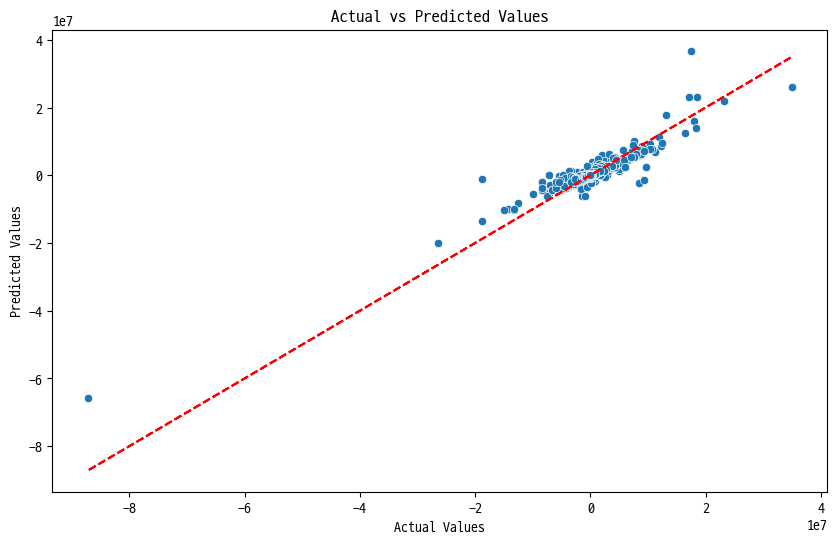

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측된 값과 실제 값 추출
predicted_values = linear_model.predict(X)
actual_values = y

# 산점도와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_values, y=predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# 45도 직선 추가
plt.plot(actual_values, actual_values, color='red', linestyle='--')

plt.show()